In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import importlib
import pandas as pd

In [2]:
from eidynamics import utils

In [3]:
def kernel_convoluted_firing_rate(spiketrain, sigma, Fs=2e4, kernel='alpha'):
    size = 6*sigma
    t    = np.linspace(-size/2, size/2, int(2e4*size))
    alpha= 1/sigma

    alphafilt = ( ((alpha**2)*t ) * np.exp(-alpha*t) )
    alphafilt = np.where(alphafilt<0, 0, alphafilt)
    alphafilt = alphafilt / np.sum(alphafilt)

    kcfr = np.convolve(spiketrain, alphafilt, mode="valid")

    return kcfr, alphafilt

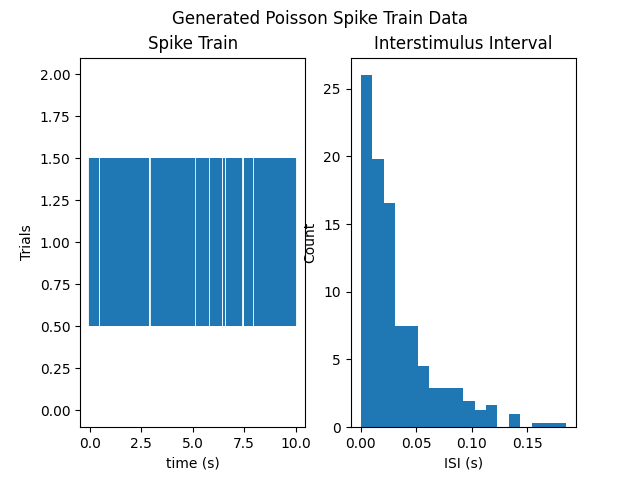

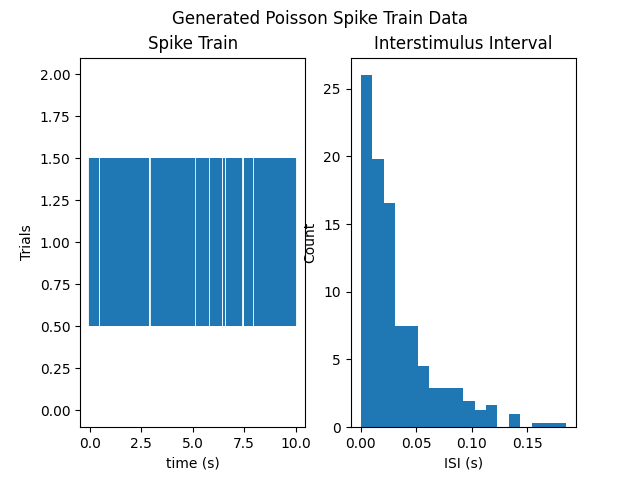

In [4]:
spikedata = utils.poisson_train(30, 1, 10, plot_raster=True)

In [39]:
spiketrain = spikedata[0][0]
time = spikedata[-1]

In [40]:
p = np.where(spiketrain)[0]

In [55]:
spiketrain_filtered = spiketrain.copy()

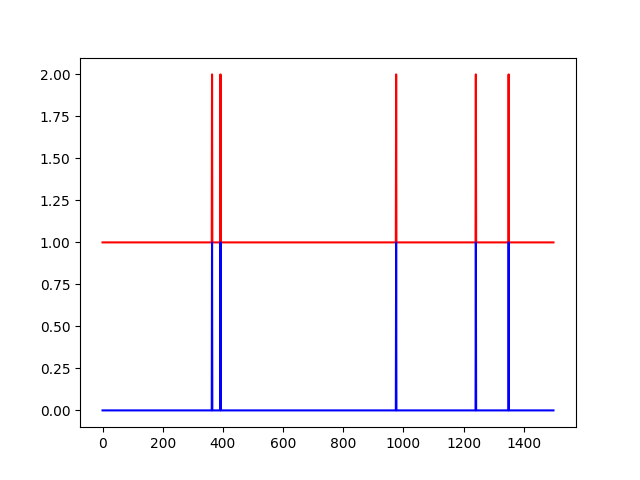

In [56]:
plt.figure()
plt.plot(1+spiketrain_filtered[12000:13500], 'r')
plt.plot(spiketrain[12000:13500], 'b')

In [59]:

omit_spikes = []
kept_spikes = []

for i,pp in enumerate(p[:-1]):

    spike_loc1 = p[i]
    spike_loc2 = p[i+1]
    
    if spike_loc2-spike_loc1 < 200:
        omit_spikes.append(spike_loc2)


print(*kept_spikes, sep='\n')
spiketrain_filtered[omit_spikes] = 0
q = np.where(spiketrain_filtered)[0]

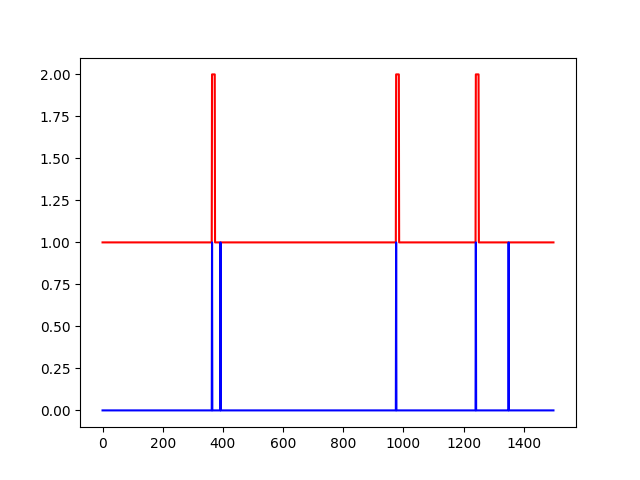

In [77]:
plt.figure()
plt.plot(1+spiketrain_filtered[12000:13500], 'r')
plt.plot(spiketrain[12000:13500], 'b')
# plt.figure()


plt.show()

In [60]:
for loc in q:
    spiketrain_filtered[loc:loc+10] = 1

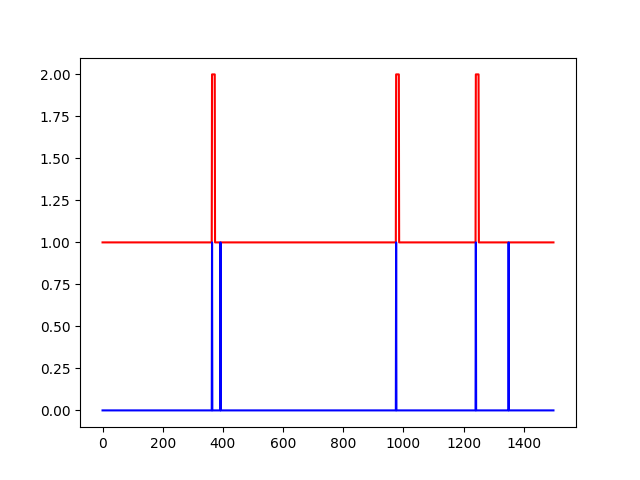

In [76]:
plt.figure()
plt.plot(1+spiketrain_filtered[12000:13500], 'r')
plt.plot(spiketrain[12000:13500], 'b')

In [64]:
sweeplength = 13.0 #seconds
datapoints  = 13.0*2e4

epochA = (0,0.200)
epochB = (0.200,0.201)
epochC = (0.201,1.000)
epochD = (1.000,11.000)
epochE = (11.000,13.000)

In [68]:
output_spike_trace = np.zeros((int(13*2e4),5))

In [69]:
trace = np.zeros((int(13*2e4)))

In [70]:
trace[4000:4020] = 1
trace[20000:220000] = spiketrain_filtered

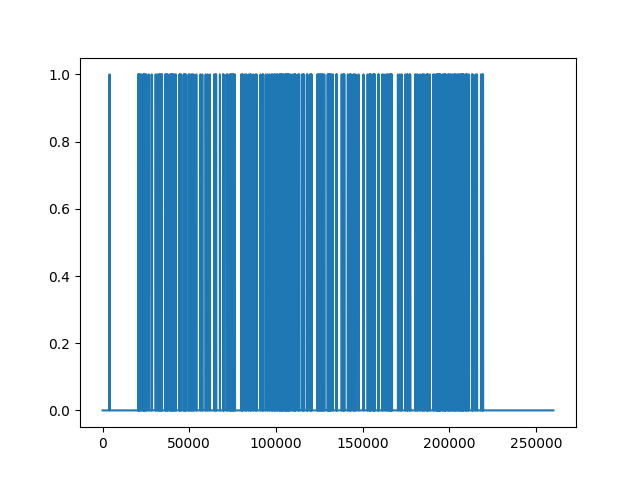

In [75]:
plt.figure()
plt.plot(trace)
plt.show()

In [83]:
trace = trace.reshape(len(trace),-1)

In [84]:
output_trace = np.concatenate((trace,trace,trace,trace,trace), axis=1)

In [85]:
np.savetxt("spike_train_13s_5sweeps.txt", output_trace)

In [9]:
acfr, alphafilt = kernel_convoluted_firing_rate(spiketrain, sigma=0.1)
acfr

array([0.00188536, 0.00188557, 0.00188578, ..., 0.00222532, 0.00222534,
       0.00222537])

In [10]:
alphafilt.shape

(12000,)

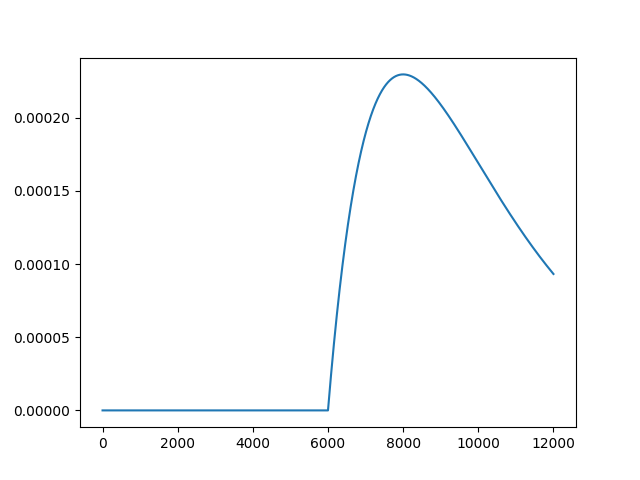

In [11]:
plt.close('all')
plt.figure()
plt.plot(alphafilt)
plt.show()

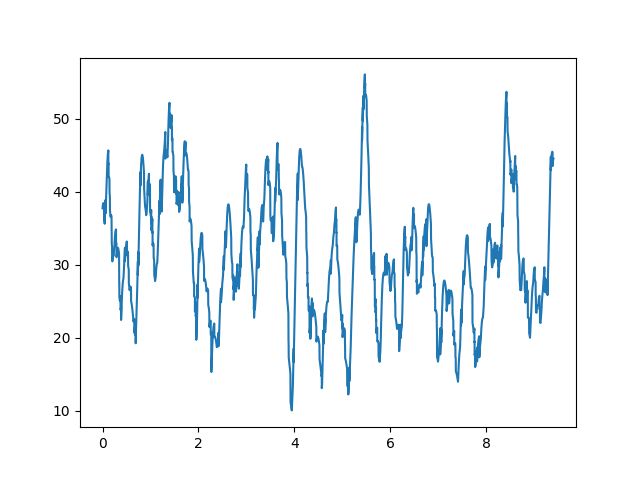

In [17]:
plt.close('all')
x =20000* acfr[::100]
plt.figure()
plt.plot(np.linspace(0, len(acfr)/2e4, len(acfr)), 2e4*acfr)
plt.show()